In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")

Qubit(ro_freq=6.72739, ef_ssm=-0.2568, qubit_thr=[-10000, -600], ro_dur=5000, ROIF=0.10268999999999995, RO_LO_pwr=16, ro_amp=0.15, ge_ssm=-0.1144, ef_time=45, ef_amp=1.5, ge_time=81, qubit_id=q1, RO_IF=None, IQ_angle=110, RO_LO=6.6247, ge_amp=1)
Qubit(ro_freq=6.65554, ef_ssm=-0.2962, qubit_thr=[-10000, 1900], ro_dur=5000, ROIF=0.030840000000000423, RO_LO_pwr=16, ro_amp=0.7, ge_ssm=-0.154, ef_time=None, ef_amp=1, ge_time=74, qubit_id=q2, RO_IF=None, IQ_angle=25, RO_LO=6.6247, ge_amp=0.8)


In [15]:
def run_pi_no_pi(num_steps, reps):
    # pnp.pi_nopi_ge(0, 0, q2, q1, general_vals_dict)
    # pnp.pi_nopi_ge(1, 1, q2, q1, general_vals_dict)

    pnp.pipi_pi_nopi(0,0,0, q1, q2, general_vals_dict)
    pnp.pipi_pi_nopi(1, 1,1, q1, q2, general_vals_dict)
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # Acquire the raw IQ data
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )
    return values

In [ ]:
def run_pi_no_pi_gf(num_steps, reps):
    num_steps = 3
    reps = 5000
    # swap_freq= -.0194
    # swap_time=0.5*7/abs(swap_freq)
    # phase = 0
    # swap_amp = 1.36 
    # pnp.pi_nopi_swap(
    #         q1,
    #         q2,
    #         general_vals_dict,
    #         copief=0,
    #         coswap=0,
    #         copige=0,
    #         num_steps=3,
    #         swap_freq=swap_freq,
    #         swap_time=swap_time,
    #         phase=phase,
    #         swap_amp=swap_amp,
    #     )
    pnp.pipi_pi_nopi(0, 0,0, q1, q2, general_vals_dict)
    pnp.pipi_pi_nopi(1, 0,2, q1, q2, general_vals_dict)
    pnp.pipi_pi_nopi(1, 1,2, q1, q2, general_vals_dict)
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # Acquire the raw IQ data
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )
    return values

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 15000
Buffers per acquistion: 15
DAQ samples per pattern: 8192
0, No error
Capturing 15 buffers. Press <enter> to abort
Capture completed in 5.855905 sec
Captured 15 buffers (2.561517 buffers per sec)
Captured 46080 records (78

<Figure size 800x800 with 0 Axes>

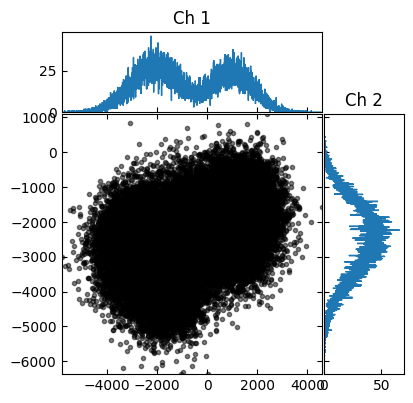

<Figure size 800x800 with 0 Axes>

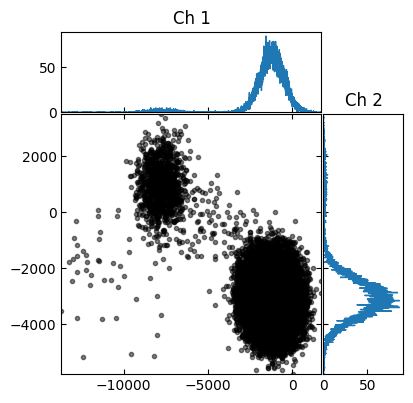

In [16]:
reps = 15000
num_steps = 3
values =  run_pi_no_pi(num_steps, reps)

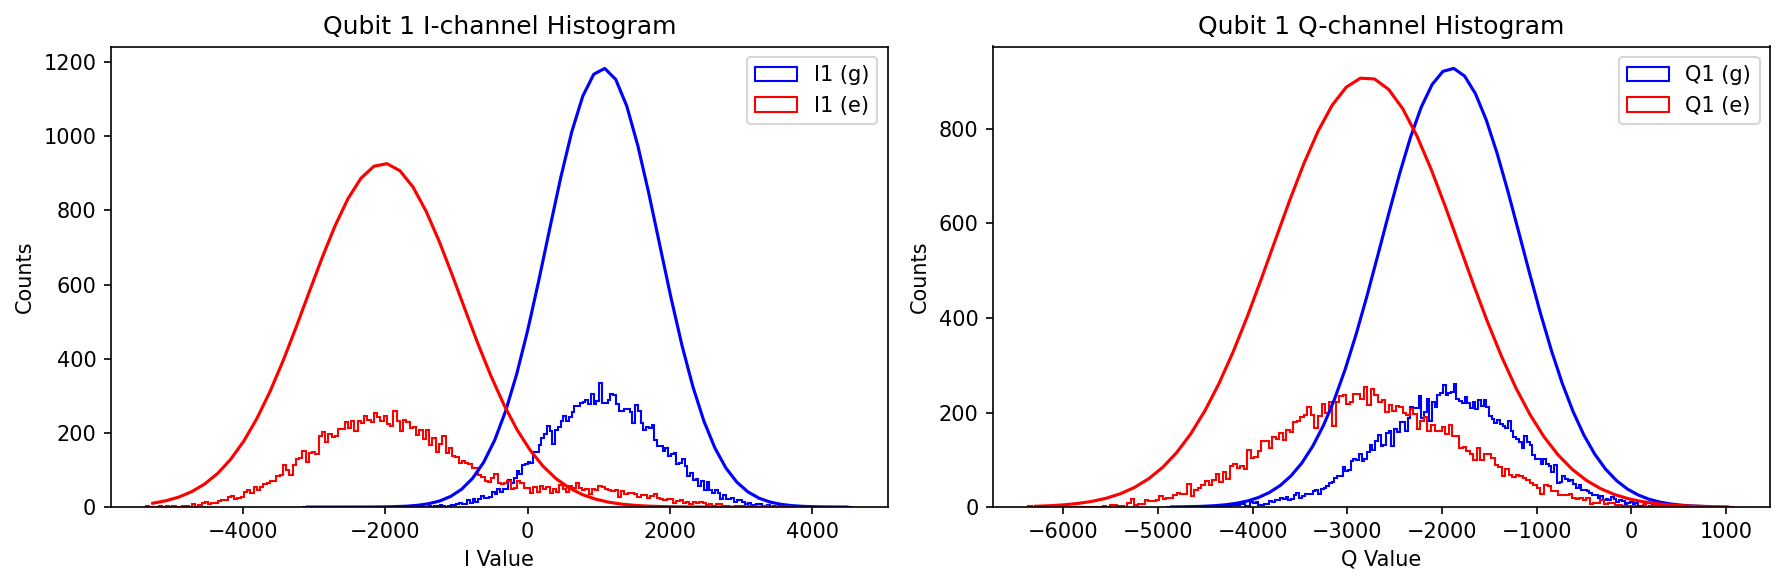

SNR of Qubit 2: 3.572931599432181


In [18]:
fit_params = plotting.plot_IQ_histograms(values.rec_readout_vs_pats_1, qubit_num=1)
SNR = plotting.calculate_SNR(fit_params)
print(f"SNR of Qubit 2: {SNR}")